# Assignment 5
Raghav Juyal \
EP20BTECH11018

# Imports

In [15]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Question 1
Download the asteroid dataset from http://astrostatistics.psu.edu/datasets/asteroid_dens.dat. \
Apply the Shapiro-Wilk test to both the asteroid density values and the natural logarithm of the \
density values. From the p values, which of these is closer to a Gaussian distribution? Verify this \
by plotting histograms of both density and its logarithm and overlaying the best-fit normal distribution.

For Density Values:
W = 0.9246721863746643 | p_value = 0.051220282912254333

For Natural Log of Density Values:
W = 0.9686306715011597 | p_value = 0.5660613775253296

From the p_values, we can say that the distribution of natural log of densities is closer to a Gaussian Distribution.


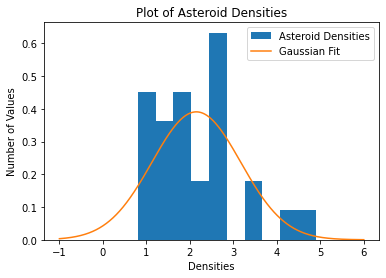

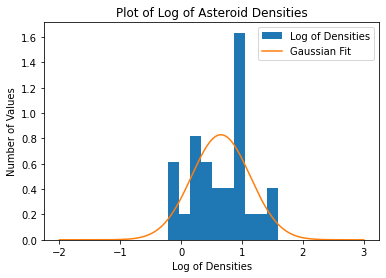

In [11]:
Data = pd.read_csv('asteroid_dens.dat',sep=' ')
Asteroids = Data['Asteroid']
Densities = Data['Dens']
Errors = Data['+/-']

# Applying Shapiro Wlik's test to density data and log of densities
W1,p1 = st.shapiro(Densities)
W2,p2 = st.shapiro(np.log(Densities))

print(f'For Density Values:\nW = {W1} | p_value = {p1}\n')
print(f'For Natural Log of Density Values:\nW = {W2} | p_value = {p2}\n')
print('From the p_values, we can say that the distribution of natural log of densities is closer to a Gaussian Distribution.')

# Gaussian fit for Density Data
mu1,sigma1 = st.norm.fit(Densities)

# Plot of Densities
x1 = np.linspace(-1,6,1000)
plt.hist(Densities,density=True,bins=10,label='Asteroid Densities')
plt.plot(x1,st.norm(mu1,sigma1).pdf(x1),label='Gaussian Fit')
plt.xlabel('Densities')
plt.ylabel('Number of Values')
plt.title('Plot of Asteroid Densities')
plt.legend()
plt.show()

# Gaussian Fit for log of Densities
mu2,sigma2 = st.norm.fit(np.log(Densities))

# Plot of log of Densities
x2 = np.linspace(-2,3,1000)
plt.hist(np.log(Densities),density=True,bins=10,label='Log of Densities')
plt.plot(x2,st.norm(mu2,sigma2).pdf(x2),label='Gaussian Fit')
plt.xlabel("Log of Densities")
plt.ylabel("Number of Values")
plt.title('Plot of Log of Asteroid Densities')
plt.legend()
plt.show()

# Question 2
Download the Hipparcos star catalog from http://iith.ac.in/~shantanud/HIP_star.dat. Detailed explanation of \
the columns in this dataset can be found in http://astrostatistics.psu.edu/datasets/HIP_star.html under “Dataset”.\
 Calculate using two-sample t-test whether the color (B-V) of the Hyades stars differs from the non-Hyades ones. \
 The Hyades stars have Right Ascension between 50◦ and 100◦, declinations between 0 and 25◦, proper motion in RA \
 between 90 and 130 mas/year, proper motion in DEC between -60 and -10 mas/year. Any other star which does not \
 satisfy any of the above conditions is considered a non-Hyades star.

In [18]:
DataSet = pd.read_csv('HIP_star.dat',sep=' ')
RA = np.array(DataSet['RA'])
DE = np.array(DataSet['DE'])
pmRA = np.array(DataSet['pmRA'])
pmDE = np.array(DataSet['pmDE'])
B_V = np.array(DataSet['B-V'])

Haydes_B_V = []
Non_Haydes_B_V = []

for i in range (len(B_V)):
    if RA[i]>=50 and RA[i]<=100 and DE[i]>=0 and DE[i]<=25 and pmRA[i]>=90 and pmRA[i]<=130 and pmDE[i]>=-60 and pmDE[i]<=-10:
        Haydes_B_V.append(B_V[i])
    else:
        Non_Haydes_B_V.append(B_V[i])

# Applying two-sample t-test
t,p = st.ttest_ind(Haydes_B_V,Non_Haydes_B_V)

print(f't_value = {t} | p_value = {p}\n')
print('According to the p_value, the null hypothesis is rejected which is "Haydes and Non-Haydes stars have same colours".')
print("Hence the colour of Haydes stars DIFFERS from that of Non-Haydes stars.")

t_value = -3.860436921860911 | p_value = 0.00011582222192442334

According to the p_value, the null hypothesis is rejected which is "Haydes and Non-Haydes stars have same colours".
Hence the colour of Haydes stars DIFFERS from that of Non-Haydes stars.


# Question 3
The T90 distribution for Beppo-Sax T90 data can be found at http://www.iith.ac.in/~shantanud/beppoSax.txt. \
Apply GMM to log10 of T90 data and find the optimum number of components using AIC and BIC by plotting BIC \
as a function of number of componts

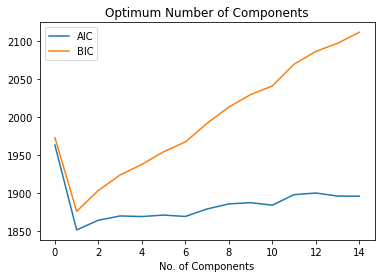

The optimum number of components is ONE


In [19]:
T90_Data = np.array(np.loadtxt('beppoSax.txt'))
Log10_T90_Data = np.log10(T90_Data).reshape(-1,1)
N = np.arange(1,16)

# Function to compute Gaussian Mixture Model
def compute_Gaussian_Mixture(N,covariance_type='full',max_iter=1000):
    models = []
    for i in range(len(N)):
        temp = GaussianMixture(n_components=N[i],max_iter=max_iter,covariance_type=covariance_type)
        temp.fit(Log10_T90_Data)
        models.append(temp)
    return models

models = compute_Gaussian_Mixture(N)

# Calculating AIC and BIC for all the models
AIC = [m.aic(Log10_T90_Data) for m in models]
BIC = [m.bic(Log10_T90_Data) for m in models]

# Plotting AIC and BIC
plt.plot(AIC,label='AIC')
plt.plot(BIC,label='BIC')
plt.title("Optimum Number of Components")
plt.xlabel("No. of Components")
plt.legend()
plt.show()
print("The optimum number of components is ONE")